In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
from sklearn import preprocessing
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("books.csv")
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,86737,86737,3877968,52,1582349177,9.781582e+12,Mary Hoffman,2002.0,City of Masks,...,12048,13385,555,314,758,3154,4872,4287,https://images.gr-assets.com/books/1294870497m...,https://images.gr-assets.com/books/1294870497s...
1350,9937,13010211,13010211,18171867,22,1596435712,9.781596e+12,Caragh M. O'Brien,2012.0,Promised,...,11766,12884,1260,256,1098,3565,4392,3573,https://images.gr-assets.com/books/1330546217m...,https://images.gr-assets.com/books/1330546217s...
1351,9942,16074758,16074758,21869436,18,1442486597,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,Dangerous Girls,...,10439,12970,2631,203,553,2029,4567,5618,https://images.gr-assets.com/books/1356513050m...,https://images.gr-assets.com/books/1356513050s...
1352,9947,21393526,21393526,40690062,19,62320521,9.780062e+12,Maria Dahvana Headley,2015.0,Magonia,...,12510,13652,2910,577,1440,3881,4772,2982,https://images.gr-assets.com/books/1413479866m...,https://images.gr-assets.com/books/1413479866s...


In [7]:
#removing irrelevant attributes and handling missing values
df.drop(['small_image_url','image_url','isbn13'],axis='columns' ,inplace=True) 
df = df.dropna()

In [8]:
#remove duplicate data
df.drop_duplicates(inplace = True)
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1349    False
1350    False
1351    False
1352    False
1353    False
Length: 1154, dtype: bool


In [9]:
#basic statistical data
df.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,1154.000000,1.154000e+03,1.154000e+03,1.154000e+03,1154.000000,1154.000000,1154.000000,1.154000e+03,1.154000e+03,1154.000000,1154.000000,1154.000000,1154.000000,1.154000e+03,1.154000e+03
mean,4255.812825,5.861464e+06,6.021962e+06,8.463542e+06,52.759099,2003.700173,3.992730,1.014788e+05,1.097559e+05,5624.032929,2556.110919,5541.903813,19312.848354,3.383584e+04,4.850917e+04
std,2874.600565,6.505104e+06,6.763622e+06,9.516846e+06,64.030030,15.985961,0.223753,3.093852e+05,3.257497e+05,11405.358583,14823.785919,17521.829222,46800.765197,9.069693e+04,1.737745e+05
min,1.000000,1.000000e+00,1.000000e+00,9.600000e+02,2.000000,1871.000000,3.230000,8.861000e+03,1.025100e+04,112.000000,33.000000,133.000000,946.000000,2.425000e+03,2.005000e+03
25%,1728.750000,1.632190e+05,1.699492e+05,1.471934e+06,24.000000,2003.000000,3.840000,1.858625e+04,2.031100e+04,1327.750000,330.250000,1041.500000,4339.250000,6.875250e+03,7.271500e+03
50%,3991.500000,3.495240e+06,3.672231e+06,4.149456e+06,38.000000,2008.000000,4.000000,3.142000e+04,3.402000e+04,2441.000000,688.000000,1891.500000,7175.000000,1.132050e+04,1.272850e+04
75%,6633.250000,9.593912e+06,9.678444e+06,1.414764e+07,61.000000,2011.000000,4.150000,6.691825e+04,7.244925e+04,4988.000000,1505.000000,3953.250000,14261.500000,2.524600e+04,2.847575e+04
max,9955.000000,3.207567e+07,3.360215e+07,4.963819e+07,1314.000000,2017.000000,4.740000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [10]:
# remove unwanted characters
df['authors'] = df['authors'].str.replace(",",'')
df['original_title'] = df['original_title'].str.replace(",",'')
df['original_publication_year'] = df['original_publication_year'].astype(int)
df['original_publication_year'] 

0       2008
1       1997
2       2005
3       2012
4       2011
        ... 
1349    2002
1350    2012
1351    2013
1352    2015
1353    2013
Name: original_publication_year, Length: 1154, dtype: int64

In [13]:
sel_cols = ['title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count']
df = df[sel_cols]

# get Harry Potter books written by J.K. Rowling
authors = df.authors.unique()
jkr = [i for i in authors if i.find('J.K. Rowling') != -1]
jkr_books = df.loc[df.authors.isin(jkr)]
all_titles = jkr_books.title.unique()
hp_titles = [i for i in all_titles if i.find('Harry Potter and ') != -1]
hp_books = jkr_books.loc[jkr_books.title.isin(hp_titles)]
hp_books = hp_books.sort_values(by=['original_publication_year'], ascending=True)

In [14]:
hp_books

,title,authors,original_publication_year,average_rating,ratings_count
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling Mary GrandPré,1997,4.44,4602479
9,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling Mary GrandPré,1998,4.37,1779331
6,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling Mary GrandPré Rufus Beck,1999,4.53,1832823
10,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling Mary GrandPré,2000,4.53,1753043
8,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling Mary GrandPré,2003,4.46,1735368
12,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling Mary GrandPré,2005,4.54,1678823
11,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling Mary GrandPré,2007,4.61,1746574


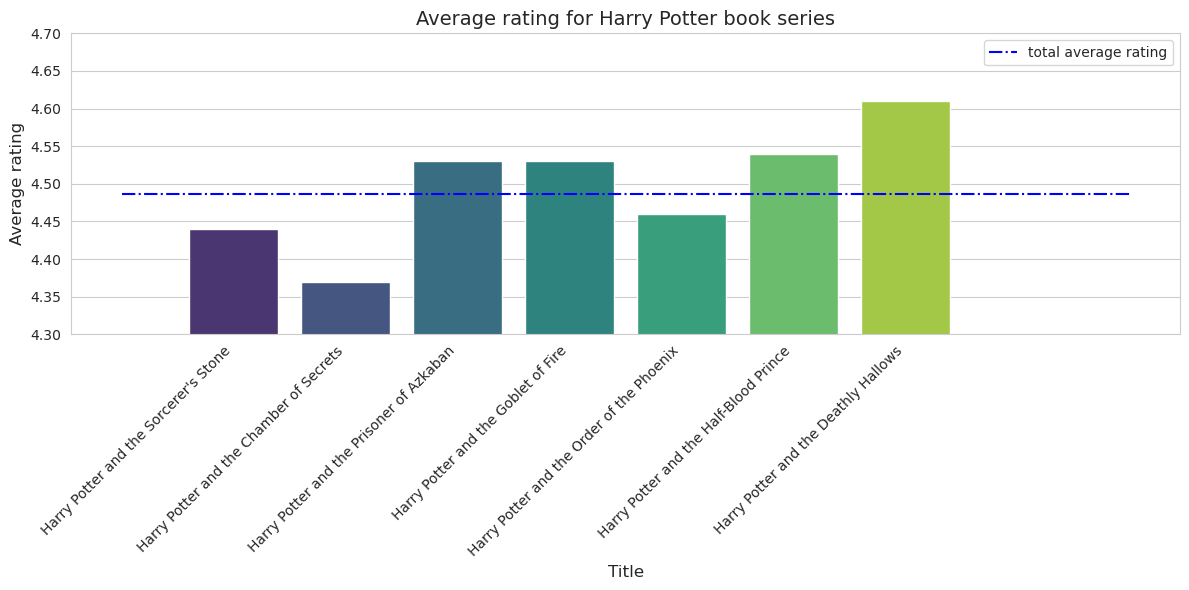

In [15]:
#the average rating of harry potter book
titles = hp_books.title.tolist()
titles = [title[:title.find(' (')] for title in titles]

weighted_avg = (hp_books.average_rating * hp_books.ratings_count).sum() / hp_books.ratings_count.sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=titles, y=hp_books.average_rating, palette="viridis")
plt.xlabel('Title', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.ylim((4.3, 4.7))
plt.hlines(weighted_avg, xmin=-1, xmax=8, color='blue', linestyles='dashdot', label='total average rating')
plt.title('Average rating for Harry Potter book series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

In [16]:
#the average rating of harry potter book
weighted_avg

4.486117244334695

In [17]:
# the higest seling books
# Get the book with the highest ratings count
highest_rated =hp_books.sort_values('ratings_count', ascending=False).iloc[0]

# Print the title of the highest rated book
print(highest_rated['title'])


Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
